Epoch 1/3


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


15000/15000 [==============================] - 10s 643us/step - loss: 0.0476
Epoch 2/3
15000/15000 [==============================] - 10s 690us/step - loss: 0.0413
Epoch 3/3
15000/15000 [==============================] - 12s 789us/step - loss: 0.0412


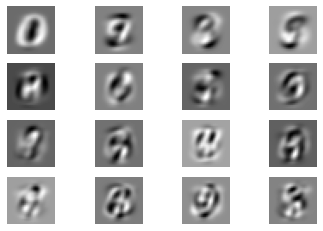

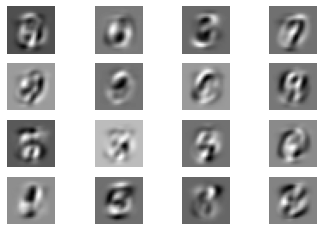

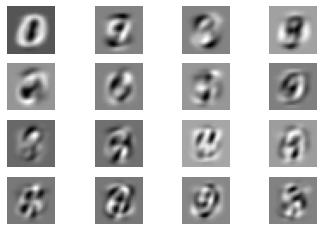

In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras import regularizers, models, optimizers
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Analytical PCA of the training set
def AnalyticalPCA(y, dimension):
    pca = PCA(n_components=dimension)
    pca.fit(y)
    loadings = pca.components_
    return loadings

# Linear Autoencoder
def LinearAE(y, dimension, learning_rate = 1e-4, regularization = 5e-4, epochs=3):
    input = Input(shape=(y.shape[1],))
    encoded = Dense(dimension, activation='linear',
                    kernel_regularizer=regularizers.l2(regularization))(input)
    decoded = Dense(y.shape[1], activation='linear',
                    kernel_regularizer=regularizers.l2(regularization))(encoded)
    autoencoder = models.Model(input, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='mean_squared_error')
    autoencoder.fit(y, y, epochs=epochs, batch_size=4, shuffle=True)
    (w1,b1,w2,b2)=autoencoder.get_weights()
    return (w1,b1,w2,b2)

def PlotResults(p,dimension,name):
    sqrt_dimension = int(np.ceil(np.sqrt(dimension)))
    plt.figure()
    for i in range(p.shape[0]):
        plt.subplot(sqrt_dimension, sqrt_dimension, i + 1)
        plt.imshow(p[i, :, :],cmap='gray')
        plt.axis('off')
    plt.savefig(name + '.png')

'''
dimension = 16                                                                  # feel free to change this, but you may have to tune hyperparameters
(y, _), (_, _) = mnist.load_data()                                              # load MNIST training images
shape_y = y.shape                                                               # store shape of y before reshaping it
y = np.reshape(y,[shape_y[0],shape_y[1]*shape_y[2]]).astype('float32')/255      # reshape y to be a 2D matrix of the dataset
p_analytical = AnalyticalPCA(y,dimension)                                       # PCA by applying SVD to y
(_, _, w2, _) = LinearAE(y, dimension)                                          # train a linear autoencoder
(p_linear_ae, _, _) = np.linalg.svd(w2.T, full_matrices=False)                    # PCA by applying SVD to linear autoencoder weights
p_analytical = np.reshape(p_analytical,[dimension,shape_y[1],shape_y[2]])       # reshape loading vectors before plotting
w2 = np.reshape(w2,[dimension,shape_y[1],shape_y[2]])                         # reshape autoencoder weights before plotting
p_linear_ae = np.reshape(p_linear_ae.T, [dimension, shape_y[1], shape_y[2]])    # reshape loading vectors before plotting
PlotResults(p_analytical,dimension,'AnalyticalPCA')
PlotResults(w2,dimension,'W2')
PlotResults(p_linear_ae,dimension,'LinearAE_PCA')
'''